In [1]:
pip install FastDTW

Note: you may need to restart the kernel to use updated packages.


In [2]:
from scipy.io import wavfile
from matplotlib import pyplot as plt
import numpy as np

from scipy.spatial.distance import euclidean
from fastdtw import fastdtw

In [3]:
# Read stored audio files for comparison
fs1, data1 = wavfile.read("oneflew1.wav")
fs2, data2 = wavfile.read("oneflew2.wav")
fs3, data3 = wavfile.read("ilovepython.wav")

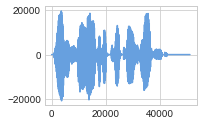

None

In [4]:
#Let's visualize the audio files we just imported using Python's matplotlib library we imported earlier
from matplotlib.pyplot import figure
# Set plot style
plt.style.use("seaborn-whitegrid")

# Create subplots for first audio file for "One Flew Over the Cuckoo's Nest"
ax = plt.subplot(2, 2, 1)
ax.plot(data1, color="#67A0DF")
# Display created figure for first audio file for "One Flew Over the Cuckoo's Nest"
fig=plt.show()
display(fig)

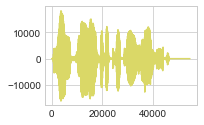

None

In [5]:
# Create subplots for second audio file for "One Flew Over the Cuckoo's Nest"
ax = plt.subplot(2, 2, 1)
ax.plot(data2, color="#dad867")

# Display created figure for second audio file for "One Flew Over the Cuckoo's Nest"
fig=plt.show()
display(fig)

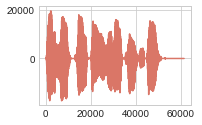

None

In [6]:
# Create subplots for third audio file for "I Love Python and I Can't Stop"
ax = plt.subplot(2, 2, 1)
ax.plot(data3, color="#da7667")

# Display created figure for third audio file for "I Love Python and I Can't Stop"
fig=plt.show()
display(fig)

In [7]:
#As you can see from the three images above, the first two audio files have the same shape but with different amplitude
#and pacing because it is the same phrase ("One Flew Over the Cuckoo's Nest"). 
#While the third file has a different shape as it is a different phrase altogether ("I Love Python and I Can't Stop")



In [8]:
# First to compare the different audio files above 
# Using the traditional Euclidean distance calculation. 
# The traditional Euclidean distance calculation In the simplest terms
# calculates the distance between any two points as a numerical difference between their coordinates. 
# if a and b are two points on a line, then the distance between them is calculated as: 
# (a-b) - this is assuming we are in a single dimensional plane. 
# To extend this to a two dimensional space, assuming point a has coordinates (a1, a2) and point b has coordinates (b1, b2
# formula: sqrt ((a1-b1)^2 + (a2-b2)^2). 
# In the formula by squaring and then taking a square root, ensures that you get an absolute value and eliminate any negative values. 
# Extend this formula to n dimensions by having n number of coordinates but still squaring and then taking a square root: 
# sqrt ((a1-b1)^2 + (a2-b2)^2....+(an-bn)^2)
# Python provides a simple function in numpy library called linalg and it simply calculates the difference between two 
# vectors as long as they are represented as an array. 
# The problem with this approach is that it completely does not take into account any time scale or latency differences. 
# apply this formula to compare the first two wav files that both have the same phrase of "One Flew Over the Cuckoo's Nest"

np.linalg.norm(data1[0]-data2[0])

1.0

In [9]:
#We get a result of 1.0. Compare one of the first two files with the third file that has the phrase "I Love Python"
np.linalg.norm(data1[0]-data3[0])

1.0

In [10]:
#The Euclidean vector difference is not taking the time axis and latency differences into account
#therefore is not able to differentiate between the wav files

#For time warping comparison, we will use the FastDW PyPi. 
#FastDW compares the distance between the different sound files. 
#Expectation is that the files that are a closer match will have a shorter distance
#The FastDW library will account for the different pacing and amplitude changes when calculatingthe distance

#Distance between audio file 1 and 2
fastdtw(data1, data2)[0]

104951593.0

In [11]:
#Distance between audio file 1 and 3
fastdtw(data1, data3)[0]

110068574.0

In [12]:
#As expected, the first two audio files have a shorter distance 
#because they are the same phrase spoken with a different voice
#Amplitude and latency while the distance between the first and third file is longer 
#because they are two completely different phrases